### **Research Question**
**How does aneuploidy impact the identity and functional state of early human embryonic cells?**

---

### **Dataset**
**Title:** Single-Cell RNA-Seq Reveals Lineage and X Chromosome Dynamics in Human Preimplantation Embryos*  
**Citation:** Petropoulos et al., 2016  
**DOI:** [10.1016/j.cell.2016.03.023](https://doi.org/10.1016/j.cell.2016.03.023)  
**Accession:** [E-MTAB-3929 (ArrayExpress)](https://www.ebi.ac.uk/arrayexpress/experiments/E-MTAB-3929/)

---

### **Key Features**

| Attribute               | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **Organism**            | *Homo sapiens* (Human)                                                      |
| **Assay Type**          | Single-cell RNA sequencing (scRNA-seq)                                      |
| **Developmental Stage** | Embryonic days **E4–E7**, spanning **8-cell to blastocyst** stages          |
| **Lineages Covered**    | Trophectoderm (TE), Epiblast (EPI), Primitive Endoderm (PrE)                |

---
### **Author**
*William Mwine*  
*July 2025*

# Data Exploration
Here we have an initial look at the counts matrix.

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
counts = pd.read_csv("data/counts.txt", sep="\t")
counts

Unnamed: 0  E5.5.101  E5.5.100  E6.2.114  E6.2.104  E6.2.107  E6.2.116  \
0           A1BG         0         0         0         0         0        16   
1       A1BG-AS1         0         0         0         0         0         0   
2           A1CF         0         0         0         0         0         0   
3            A2M         0         0         0         0         0         0   
4        A2M-AS1         0         0         0         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
26173     ZYG11A         5        16        22         2         1        48   
26174     ZYG11B         0         1        19         1         0         8   
26175        ZYX        17        17         9        16        26        88   
26176      ZZEF1         0         1        70         8        23         5   
26177       ZZZ3        12         7       110         4         1        12   

       E7.2.138  E6.2.118  E6.2.105  ...  E3.50.3415  E3.51.3421  E3.53.3437  \
0             0         0         0  ...         327        2167         170   
1             0         0         0  ...           0          88           0   
2             0         0         0  ...          39          86           0   
3             0         0         0  ...           0           0           0   
4             0         0         0  ...           0           0           0   
...         ...       ...       ...  ...         ...         ...         ...   
26173         0         3       111  ...          90         515          70   
26174         0        23         0  ...           0         133           0   
26175      2301         1         0  ...          17         492          39   
26176       240        16         0  ...          50         120          86   
26177       306        36       326  ...         261         791         146   

       E3.51.3423  E3.52.3429  E3.49.3407  E3.51.3426  E3.47.3391  E3.52.3431  \
0             451         104         446        2517         473         104   
1               0           0           0           1           7           0   
2               0          15          11          94          40          66   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
26173         295          34         219         221          97          25   
26174          52           0           0           0          98           0   
26175          87          38          71         185          14           4   
26176           1         199           0          65           0         136   
26177        1705         295         996         740         986         318   

       E3.53.3438  
0             116  
1               0  
2              34  
3               0  
4               0  
...           ...  
26173         188  
26174           0  
26175         160  
26176         144  
26177           0  

[26178 rows x 1530 columns]

In [3]:
counts.rename(columns={"Unnamed: 0": "gene_names"}, inplace=True)
counts = counts.set_index("gene_names")
counts

E5.5.101  E5.5.100  E6.2.114  E6.2.104  E6.2.107  E6.2.116  \
gene_names                                                               
A1BG               0         0         0         0         0        16   
A1BG-AS1           0         0         0         0         0         0   
A1CF               0         0         0         0         0         0   
A2M                0         0         0         0         0         0   
A2M-AS1            0         0         0         0         0         0   
...              ...       ...       ...       ...       ...       ...   
ZYG11A             5        16        22         2         1        48   
ZYG11B             0         1        19         1         0         8   
ZYX               17        17         9        16        26        88   
ZZEF1              0         1        70         8        23         5   
ZZZ3              12         7       110         4         1        12   

            E7.2.138  E6.2.118  E6.2.105  E7.2.144  ...  E3.50.3415  \
gene_names                                          ...               
A1BG               0         0         0         0  ...         327   
A1BG-AS1           0         0         0         0  ...           0   
A1CF               0         0         0         0  ...          39   
A2M                0         0         0         0  ...           0   
A2M-AS1            0         0         0         0  ...           0   
...              ...       ...       ...       ...  ...         ...   
ZYG11A             0         3       111        10  ...          90   
ZYG11B             0        23         0        13  ...           0   
ZYX             2301         1         0       904  ...          17   
ZZEF1            240        16         0         0  ...          50   
ZZZ3             306        36       326        61  ...         261   

            E3.51.3421  E3.53.3437  E3.51.3423  E3.52.3429  E3.49.3407  \
gene_names                                                               
A1BG              2167         170         451         104         446   
A1BG-AS1            88           0           0           0           0   
A1CF                86           0           0          15          11   
A2M                  0           0           0           0           0   
A2M-AS1              0           0           0           0           0   
...                ...         ...         ...         ...         ...   
ZYG11A             515          70         295          34         219   
ZYG11B             133           0          52           0           0   
ZYX                492          39          87          38          71   
ZZEF1              120          86           1         199           0   
ZZZ3               791         146        1705         295         996   

            E3.51.3426  E3.47.3391  E3.52.3431  E3.53.3438  
gene_names                                                  
A1BG              2517         473         104         116  
A1BG-AS1             1           7           0           0  
A1CF                94          40          66          34  
A2M                  0           0           0           0  
A2M-AS1              0           0           0           0  
...                ...         ...         ...         ...  
ZYG11A             221          97          25         188  
ZYG11B               0          98           0           0  
ZYX                185          14           4         160  
ZZEF1               65           0         136         144  
ZZZ3               740         986         318           0  

[26178 rows x 1529 columns]

In [8]:
adata = sc.AnnData(X=counts.T)

In [9]:
adata.var_names_make_unique()

In [10]:
adata.var_names

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2MP1',
       'A3GALT2', 'A4GALT', 'A4GNT',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='gene_names', length=26178)

In [11]:
adata.obs_names

Index(['E5.5.101', 'E5.5.100', 'E6.2.114', 'E6.2.104', 'E6.2.107', 'E6.2.116',
       'E7.2.138', 'E6.2.118', 'E6.2.105', 'E7.2.144',
       ...
       'E3.50.3415', 'E3.51.3421', 'E3.53.3437', 'E3.51.3423', 'E3.52.3429',
       'E3.49.3407', 'E3.51.3426', 'E3.47.3391', 'E3.52.3431', 'E3.53.3438'],
      dtype='object', length=1529)

In [12]:
adata.X

array([[  0,   0,   0, ...,  17,   0,  12],
       [  0,   0,   0, ...,  17,   1,   7],
       [  0,   0,   0, ...,   9,  70, 110],
       ...,
       [473,   7,  40, ...,  14,   0, 986],
       [104,   0,  66, ...,   4, 136, 318],
       [116,   0,  34, ..., 160, 144,   0]], shape=(1529, 26178))

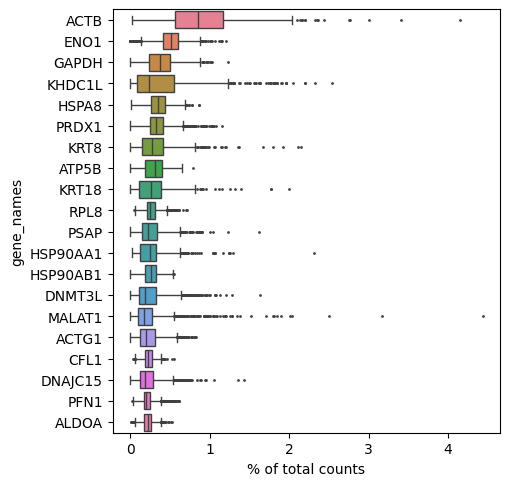

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20)

# QC and processing
In this step we;
 * Doublet detection. Doublets can affect downstream analysis so it essential to detecet and remove them
 * Identify Mitochondrial and Ribosomal genes. We use these as indicators of cell quality
 * We calculate QC metrics that we use to filter low quality cells 

In [14]:
%matplotlib inline
import scrublet as scr
from scipy.stats import median_abs_deviation
from biomart import BiomartServer
import time 
import io

## Doulet Detection
Only 1 cell detected as a doublet. Before filtering, we want to look at other metrics 

In [15]:
scrub = scr.Scrublet(adata.X)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.56
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 12.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.5%
Elapsed time: 3.0 seconds


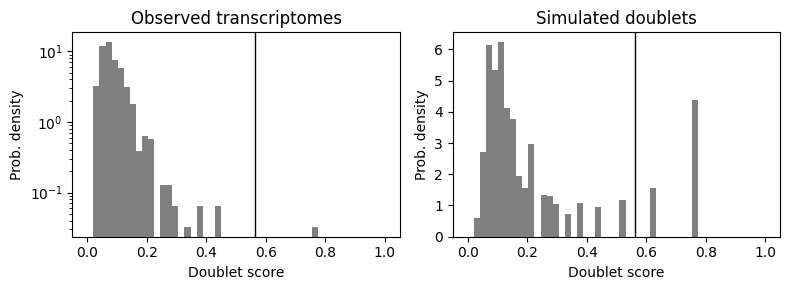

In [16]:
scrub.plot_histogram();

In [17]:
adata.obs['predicted_doublets'] = predicted_doublets
adata.obs['doublet_scores'] = doublet_scores

In [18]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [20]:
adata.obs[adata.obs['predicted_doublets']]

predicted_doublets  doublet_scores  n_genes
E7.9.574                True        0.772152     9128

## Annotation of Mitochondrial and Ribosomal Genes

- A small percentage of genes are ribosomal.
- No mitochondrial genes were detected.

**Quality Control (QC) and Outlier Removal**
- The QC plots appear mostly satisfactory.
- To remove outliers, we apply the Median Absolute Deviation (MAD) method.
**Outlier Filtering Method:**
For each QC metric M, we compute its MAD and exclude data points that fall outside the range:
[Median(M) − nmads ⋅ MAD, Median(M) + nmads ⋅ MAD]
Where:
- `M` is the metric of interest
- `nmads = 5`

In [24]:
adata.var['MT'] = adata.var_names.str.startswith('MT-')
adata.var['RIBO'] = adata.var_names.str.startswith(("MRPS", "MRPL"))

In [25]:
adata.var[(adata.var['MT']) | (adata.var['RIBO'])]

n_cells     MT  RIBO
gene_names                      
MRPL1          1464  False  True
MRPL10         1486  False  True
MRPL11         1517  False  True
MRPL12         1525  False  True
MRPL13         1521  False  True
...             ...    ...   ...
MRPS36         1489  False  True
MRPS5          1522  False  True
MRPS6          1482  False  True
MRPS7          1529  False  True
MRPS9          1507  False  True

[81 rows x 3 columns]

In [26]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['MT', 'RIBO'], percent_top=None, log1p=False, inplace=True)

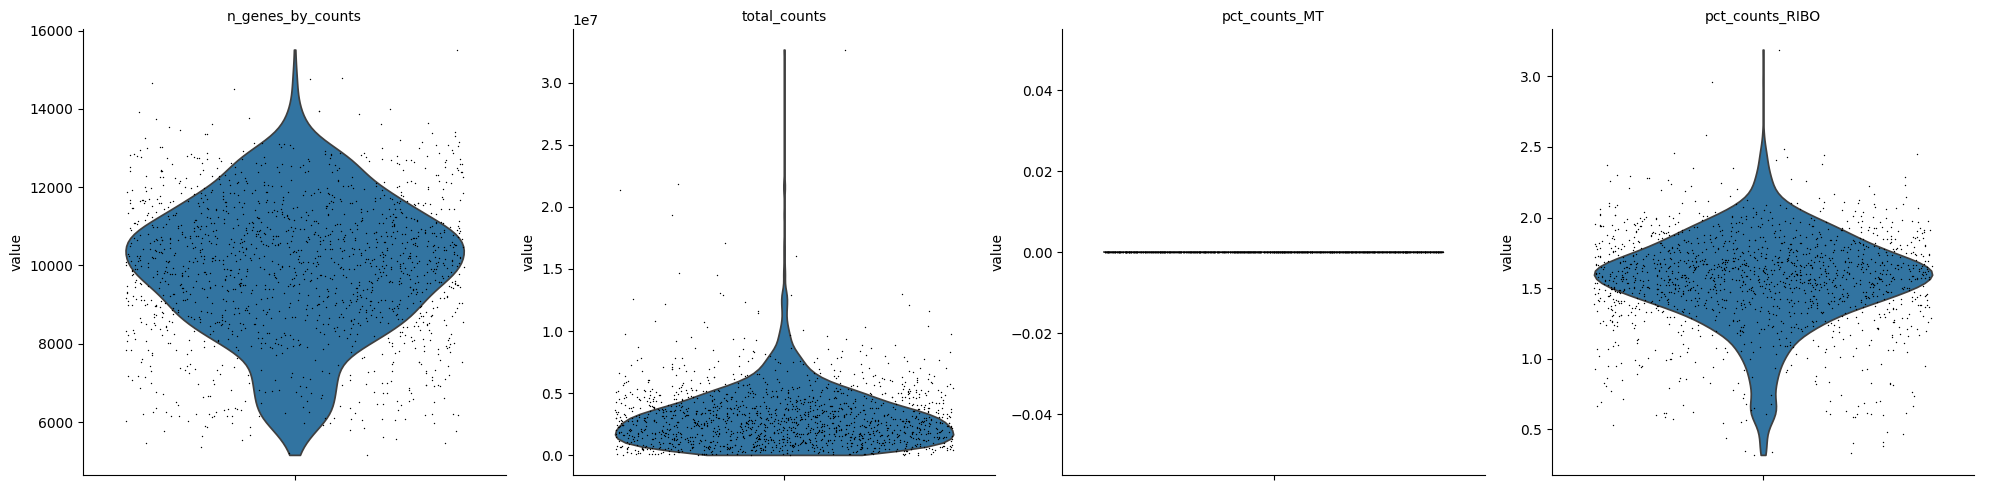

In [27]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_MT', 'pct_counts_RIBO'],
             jitter=0.4, multi_panel=True)

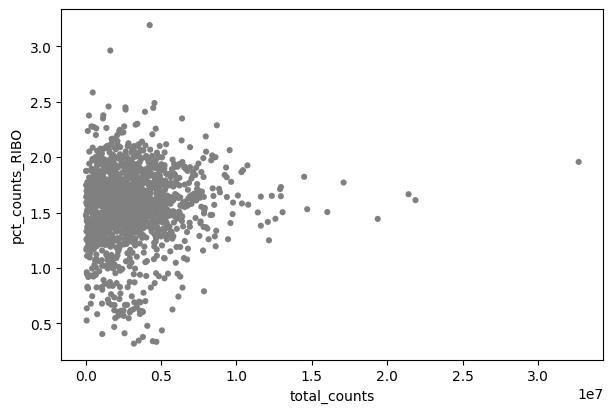

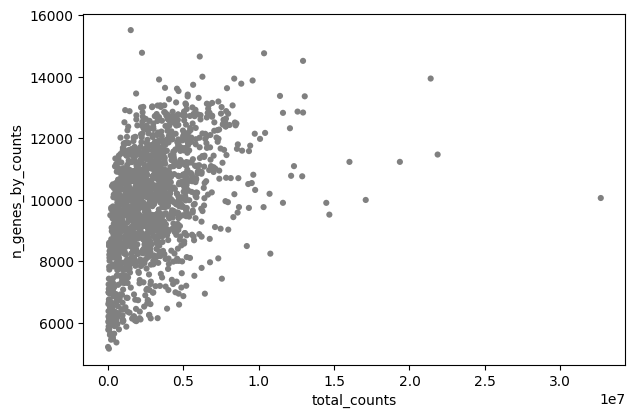

In [29]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_RIBO')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [30]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

In [31]:
adata

AnnData object with n_obs × n_vars = 1529 × 23633
    obs: 'predicted_doublets', 'doublet_scores', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'pct_counts_RIBO'
    var: 'n_cells', 'MT', 'RIBO', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [32]:
adata.obs["outlier"] = (
    is_outlier(adata, "total_counts", 5)
    | is_outlier(adata, "n_genes_by_counts", 5)
)
adata.obs.outlier.value_counts()

outlier
False    1499
True       30
Name: count, dtype: int64

In [33]:
print(f"Total number of cells: {adata.n_obs}")
adata = adata[(~adata.obs.outlier)].copy()

print(f"Number of cells after filtering of low quality cells: {adata.n_obs}")

Total number of cells: 1529
Number of cells after filtering of low quality cells: 1499


In [34]:
adata = adata[adata.obs.pct_counts_MT < 5, :].copy()
adata = adata[adata.obs.pct_counts_RIBO < 5, :].copy()

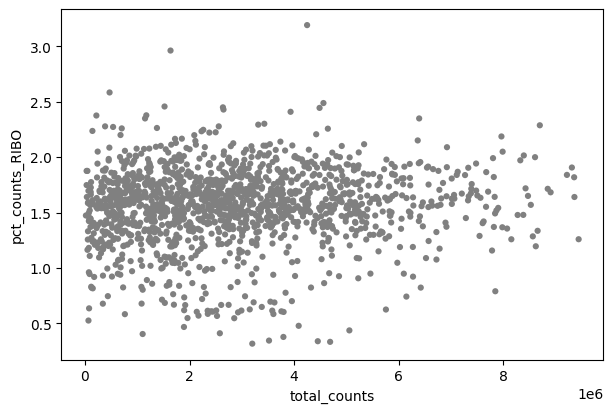

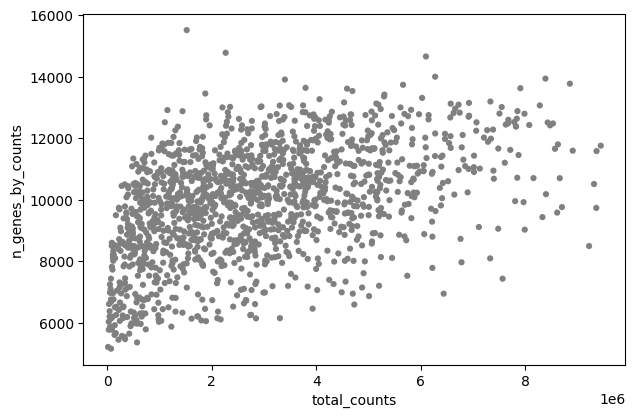

In [36]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_RIBO')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

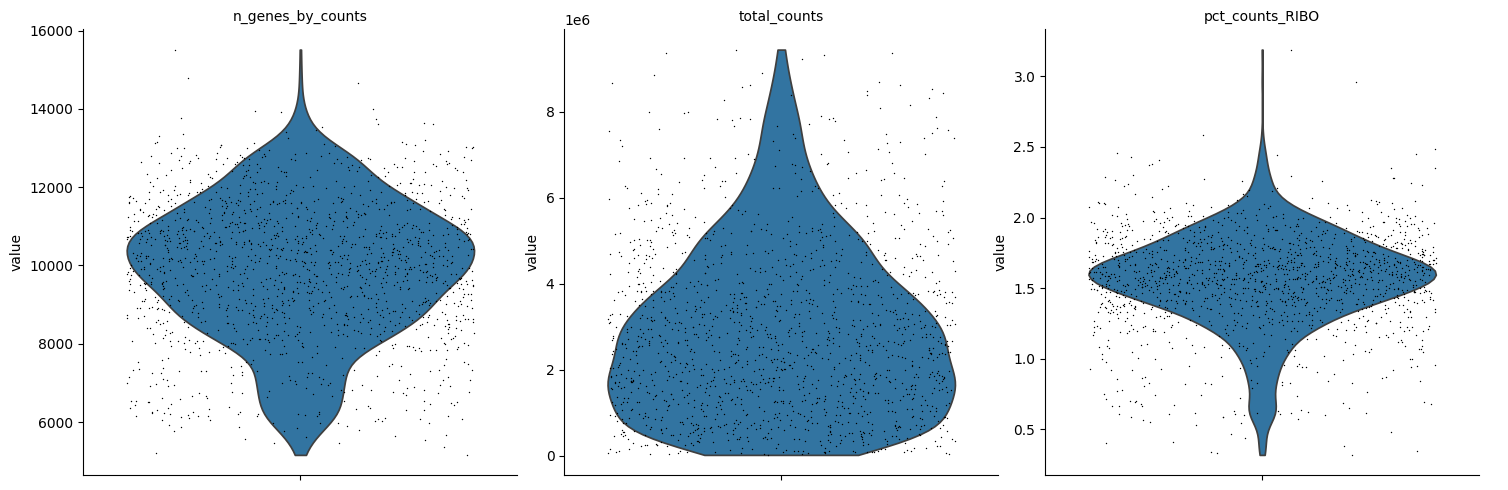

In [38]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_RIBO'],
             jitter=0.4, multi_panel=True)

# Normalize
We normalize our data so its comparable between cells  

In [39]:
adata.raw = adata
# normalize
sc.pp.normalize_total(adata, target_sum=None, inplace=True)
adata.layers["normalized"] = adata.X.copy() 

# Log-transform the normalized data
sc.pp.log1p(adata)
adata.layers["log1p"] = adata.X.copy() 

# Clustering
In this section we:   
 * indentify highly variable genes (HVG) that we can use in dimensionality reduction and clustering where we can identtify cell types and      lineages in our data. The HVG are spread out across mean expressions of genes (This is a good sign)
 * Carry out pca and use this during clustering
 * We also look at how embryo lineage marker genes are expressed across the clusters

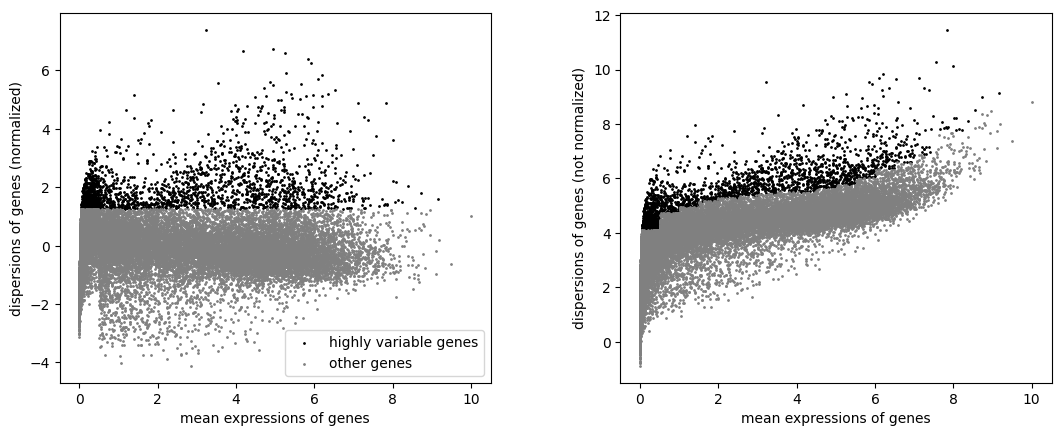

In [40]:
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)
sc.pl.highly_variable_genes(adata)

/home/william/anaconda3/envs/cell_fate_py/lib/python3.10/site-packages/scanpy/preprocessing/_pca/__init__.py:227: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(adata, mask_var, use_highly_variable)


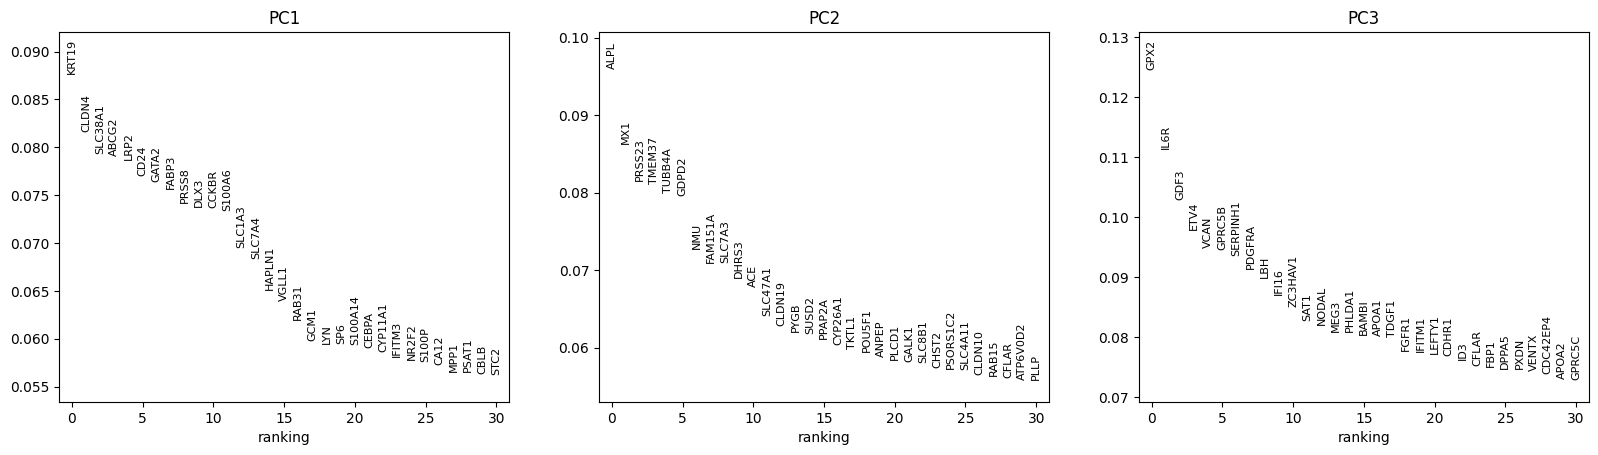

In [41]:
sc.pp.pca(adata, n_comps=50, use_highly_variable=True)
sc.pl.pca_loadings(adata, include_lowest=False)

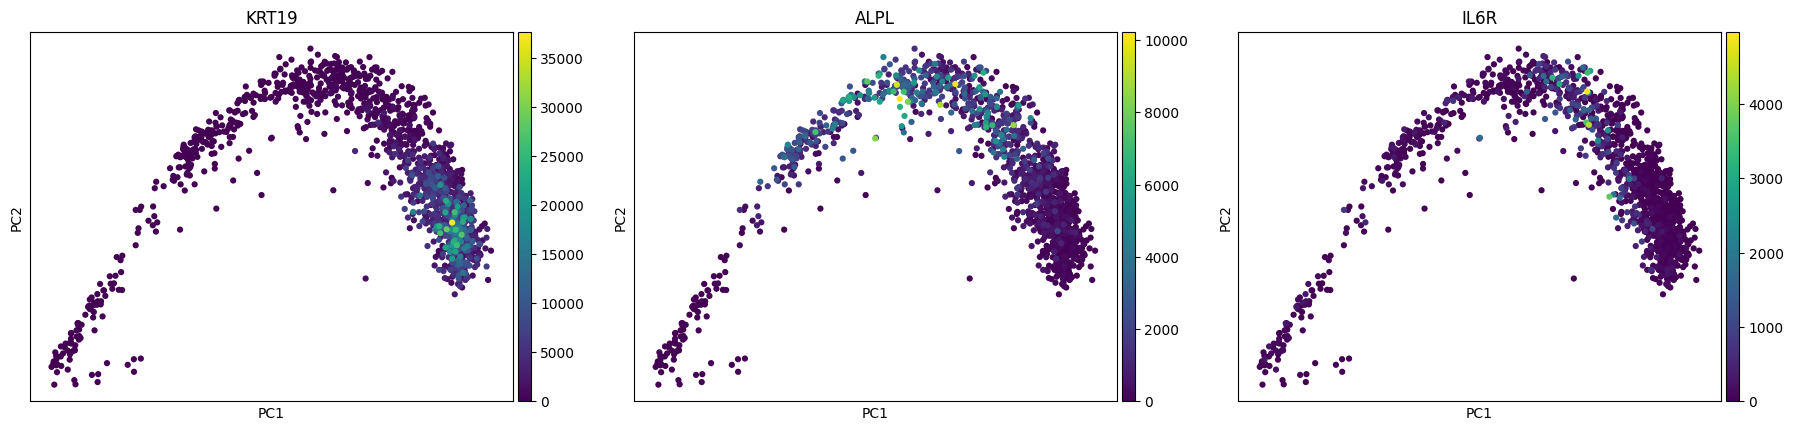

In [42]:
sc.pl.pca(adata, color=['KRT19', 'ALPL', 'IL6R'])

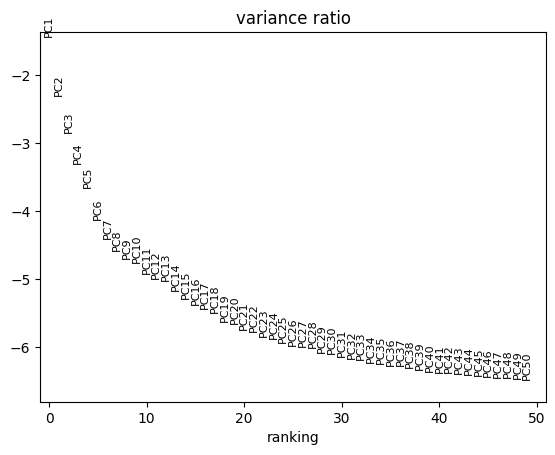

In [43]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [44]:
sc.pp.neighbors(adata, n_pcs=37)
sc.tl.umap(adata)

/home/william/anaconda3/envs/cell_fate_py/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
resolutions = [0.1, 0.3, 0.6, 1, 1.5, 2, 2.5, 3]

for res in resolutions:
    sc.tl.leiden(adata, resolution=res, key_added='leiden_' + str(res), flavor="igraph" )

In [46]:
adata

AnnData object with n_obs × n_vars = 1499 × 23633
    obs: 'predicted_doublets', 'doublet_scores', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'pct_counts_RIBO', 'outlier', 'leiden_0.1', 'leiden_0.3', 'leiden_0.6', 'leiden_1', 'leiden_1.5', 'leiden_2', 'leiden_2.5', 'leiden_3'
    var: 'n_cells', 'MT', 'RIBO', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden_0.1', 'leiden_0.3', 'leiden_0.6', 'leiden_1', 'leiden_1.5', 'leiden_2', 'leiden_2.5', 'leiden_3'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'normalized', 'log1p'
    obsp: 'distances', 'connectivities'

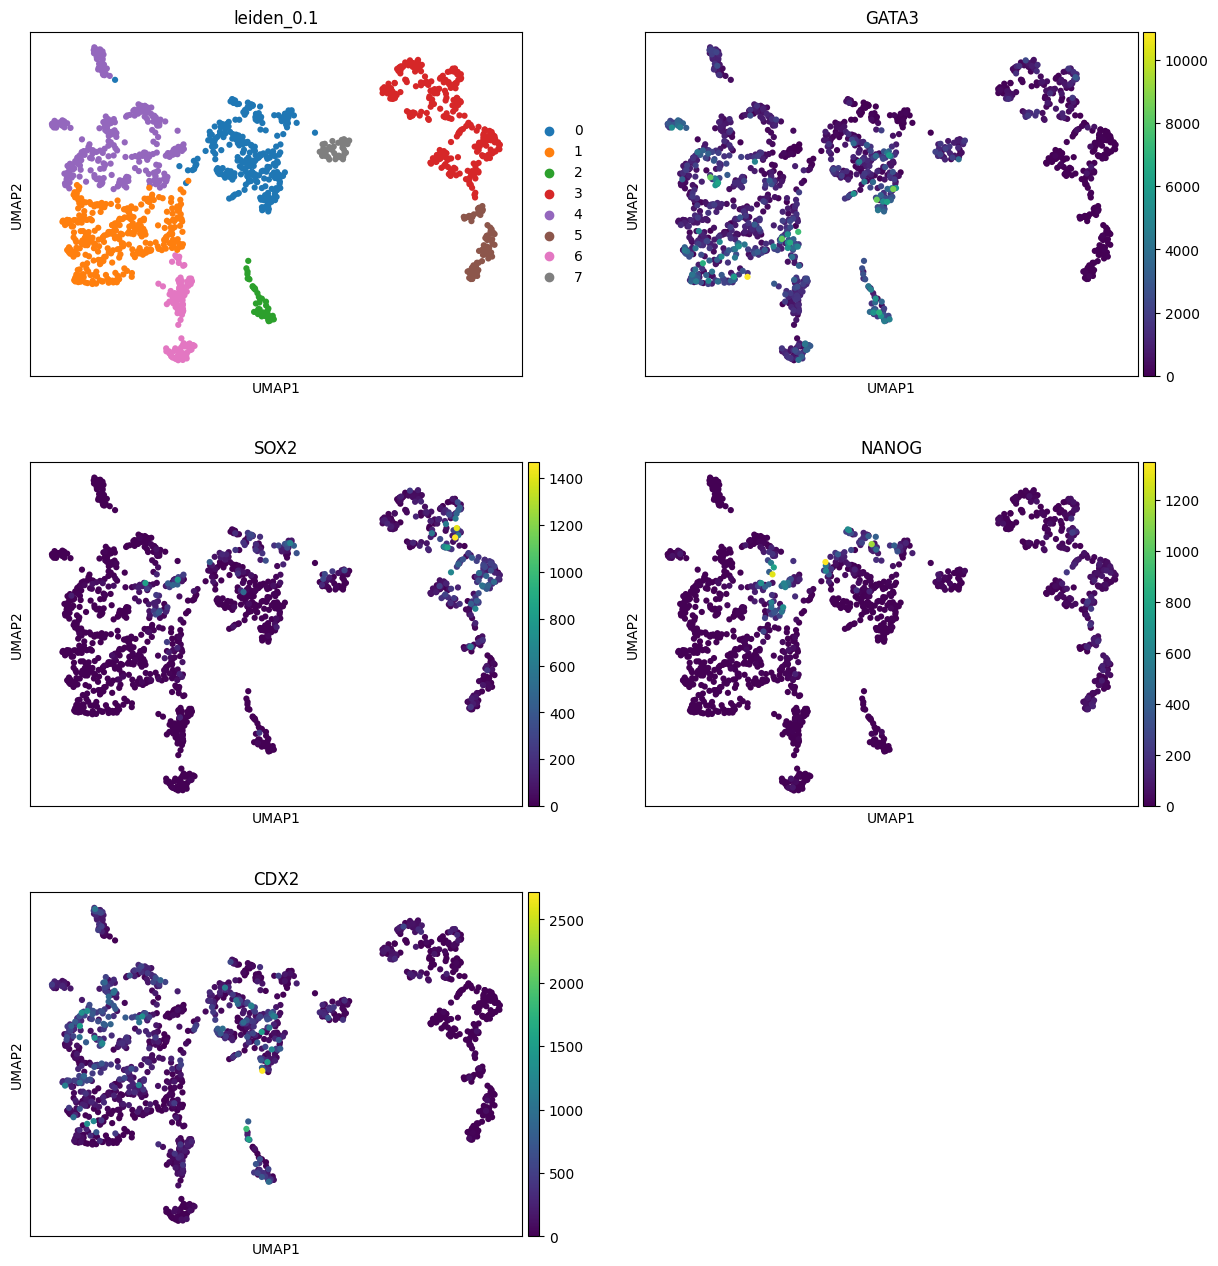

In [47]:
sc.pl.umap(adata, color=['leiden_0.1', 'GATA3', 'SOX2', 'NANOG', 'CDX2'], ncols=2)

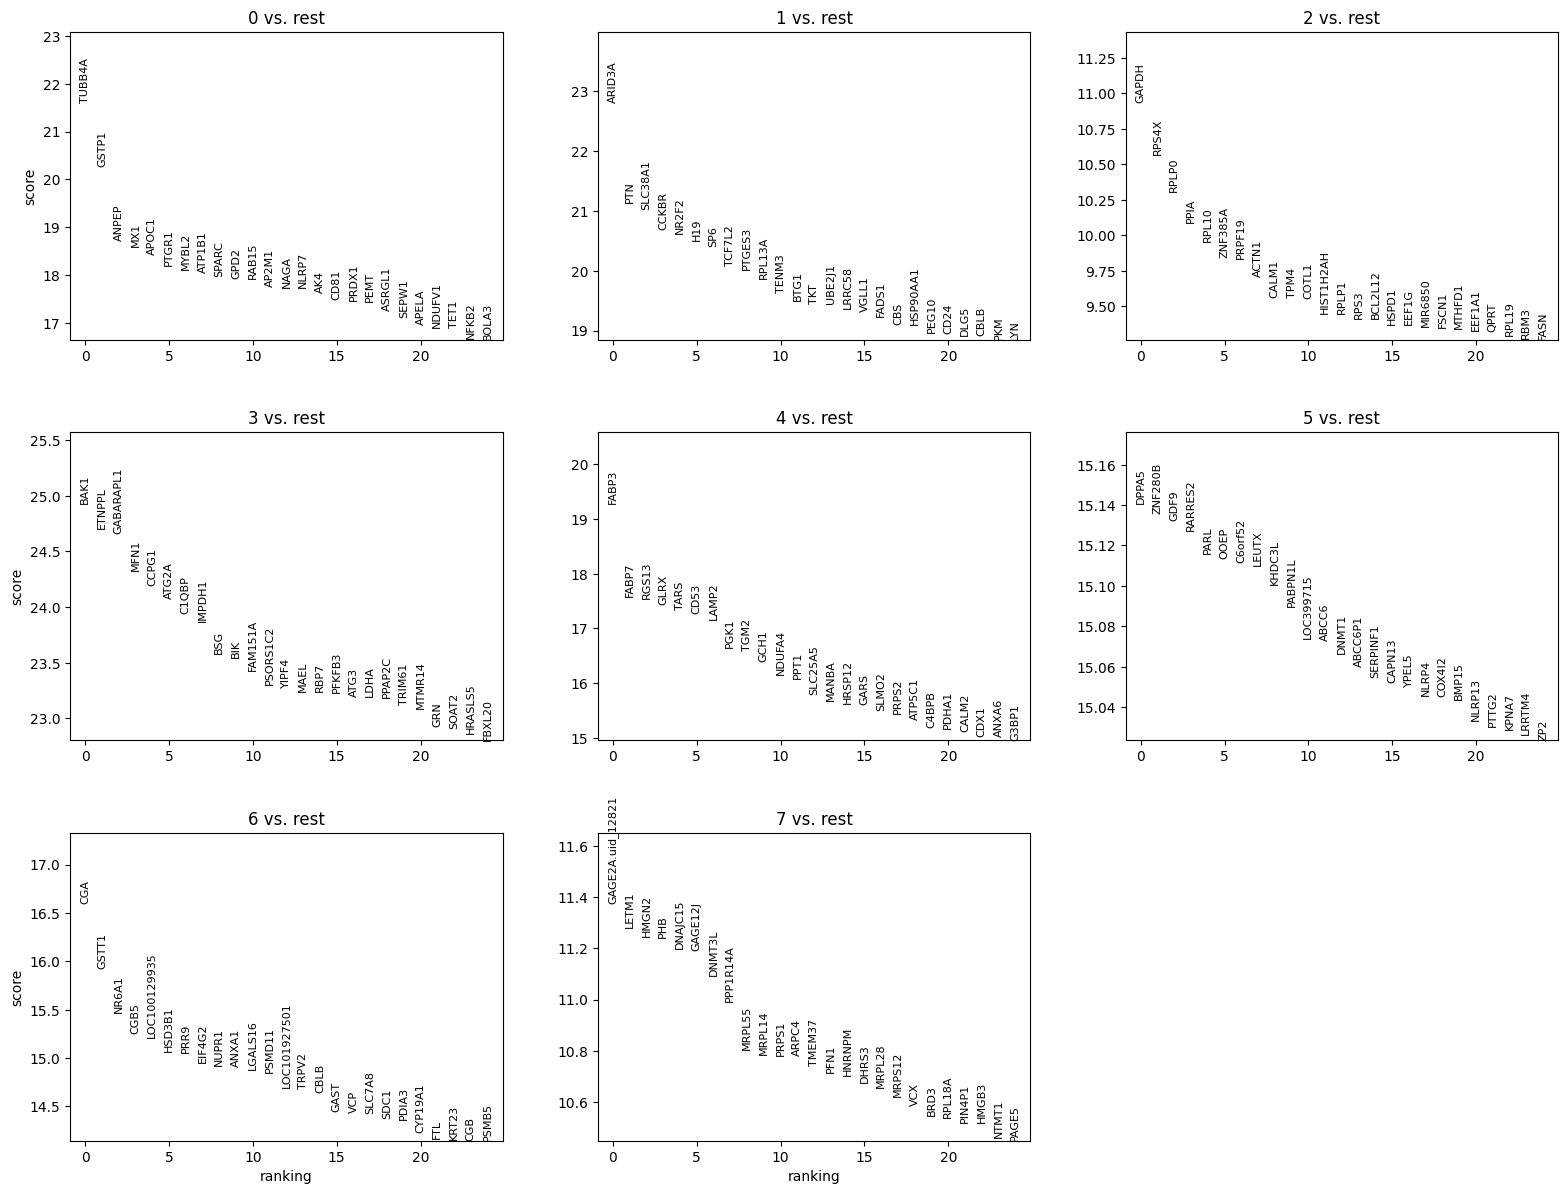

In [48]:
sc.tl.rank_genes_groups(adata, 'leiden_0.1', method='wilcoxon', use_raw=False, key_added='rank_leiden_0.1')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key='rank_leiden_0.1', ncols=3)

In [49]:
num_clusters = adata.obs['leiden_0.1'].nunique()
cluster_markers = {}
for cluster in range(num_clusters):
    cluster_markers[f"{cluster}"] = list(sc.get.rank_genes_groups_df(adata, str(cluster), key='rank_leiden_0.1').head(10).names)


# Querying additional info
Here we just query additional genomic information that we can use for karyotype inference

In [50]:
server = BiomartServer("http://www.ensembl.org/biomart")
dataset = server.datasets['hsapiens_gene_ensembl']

In [51]:
gene_names = list(adata.var_names)

In [52]:
def query_genes_by_name(gene_names, batch_size=300):
    results = []
    for i in range(0, len(gene_names), batch_size):
        batch = gene_names[i:i+batch_size]
        try:
            response = dataset.search({
                'filters': {'external_gene_name': batch},
                'attributes': ['ensembl_gene_id', 'external_gene_name', 'chromosome_name', 'start_position', 'end_position']
            })
            df = pd.read_csv(io.StringIO(response.text), sep="\t", header=None)
            df.columns = ['ensembl_gene_id', 'gene_name', 'chromosome', 'start', 'end']
            results.append(df)
            time.sleep(0.2)  # avoid rate-limiting
        except Exception as e:
            print(f"Batch {i // batch_size + 1} failed: {e}")
    return pd.concat(results, ignore_index=True)

# usage:
gene_table = query_genes_by_name(gene_names)

Batch 36 failed: No columns to parse from file
Batch 37 failed: No columns to parse from file
Batch 38 failed: No columns to parse from file


In [53]:
gene_table

ensembl_gene_id   gene_name           chromosome      start        end
0      ENSG00000291368         ACR  HG1311_HG2539_PATCH      74316      81453
1      ENSG00000291420       ACTG1         HG1369_PATCH     165618     180052
2      ENSG00000154734     ADAMTS1                   21   26835755   26845409
3      ENSG00000139826      ABHD13                   13  108218392  108234243
4      ENSG00000154930       ACSS1                   20   25006230   25058980
...                ...         ...                  ...        ...        ...
23225  ENSG00000227124      ZNF717                    3   75678660   75785583
23226  ENSG00000178917      ZNF852                    3   44491766   44510636
23227  ENSG00000203995      ZYG11A                    1   52842511   52894998
23228  ENSG00000235079  ZRANB2-AS1                    1   71047497   71067483
23229  ENSG00000116996         ZP4                    1  237877864  237890922

[23230 rows x 5 columns]

In [54]:
gene_table = gene_table.set_index('gene_name')
gene_table

ensembl_gene_id           chromosome      start        end
gene_name                                                             
ACR         ENSG00000291368  HG1311_HG2539_PATCH      74316      81453
ACTG1       ENSG00000291420         HG1369_PATCH     165618     180052
ADAMTS1     ENSG00000154734                   21   26835755   26845409
ABHD13      ENSG00000139826                   13  108218392  108234243
ACSS1       ENSG00000154930                   20   25006230   25058980
...                     ...                  ...        ...        ...
ZNF717      ENSG00000227124                    3   75678660   75785583
ZNF852      ENSG00000178917                    3   44491766   44510636
ZYG11A      ENSG00000203995                    1   52842511   52894998
ZRANB2-AS1  ENSG00000235079                    1   71047497   71067483
ZP4         ENSG00000116996                    1  237877864  237890922

[23230 rows x 4 columns]

In [55]:
gene_table_unique = gene_table[~gene_table.index.duplicated(keep='first')]
gene_table_unique

ensembl_gene_id           chromosome      start        end
gene_name                                                             
ACR         ENSG00000291368  HG1311_HG2539_PATCH      74316      81453
ACTG1       ENSG00000291420         HG1369_PATCH     165618     180052
ADAMTS1     ENSG00000154734                   21   26835755   26845409
ABHD13      ENSG00000139826                   13  108218392  108234243
ACSS1       ENSG00000154930                   20   25006230   25058980
...                     ...                  ...        ...        ...
ZNF830      ENSG00000198783                   17   34961540   34963777
ZNF717      ENSG00000227124                    3   75678660   75785583
ZYG11A      ENSG00000203995                    1   52842511   52894998
ZRANB2-AS1  ENSG00000235079                    1   71047497   71067483
ZP4         ENSG00000116996                    1  237877864  237890922

[20139 rows x 4 columns]

In [56]:
adata.var = pd.merge(adata.var, gene_table_unique, left_index=True, right_index=True, how='left')

In [57]:
standard_chroms = [str(i) for i in range(1, 23)] + ["X", "Y"]

adata.var['chromosome'] = adata.var['chromosome'].apply(
    lambda x: f'chr{x}' if str(x) in standard_chroms else x
)

In [58]:
adata.var

n_cells     MT   RIBO  n_cells_by_counts  mean_counts  \
gene_names                                                          
A1BG            571  False  False                571    32.089601   
A1BG-AS1        194  False  False                194     1.126880   
A1CF            151  False  False                151     2.355788   
A2M             133  False  False                133     1.567691   
A2M-AS1          57  False  False                 57     0.431001   
...             ...    ...    ...                ...          ...   
ZYG11A         1316  False  False               1316   107.223676   
ZYG11B         1137  False  False               1137    46.550033   
ZYX            1479  False  False               1479   251.349248   
ZZEF1          1292  False  False               1292    77.043165   
ZZZ3           1454  False  False               1454   188.452583   

            pct_dropout_by_counts  total_counts  highly_variable     means  \
gene_names                                                                   
A1BG                    62.655330         49065             True  3.459785   
A1BG-AS1                87.311969          1723            False  0.628735   
A1CF                    90.124264          3602            False  1.242799   
A2M                     91.301504          2397            False  0.894380   
A2M-AS1                 96.272073           659            False  0.372899   
...                           ...           ...              ...       ...   
ZYG11A                  13.930674        163945            False  4.571177   
ZYG11B                  25.637672         71175            False  3.711862   
ZYX                      3.270111        384313            False  5.375675   
ZZEF1                   15.500327        117799            False  4.287999   
ZZZ3                     4.905167        288144            False  5.108596   

            dispersions  dispersions_norm  ensembl_gene_id   chromosome  \
gene_names                                                                
A1BG           6.432617          2.748121  ENSG00000121410        chr19   
A1BG-AS1       2.736047         -1.337072  ENSG00000268895        chr19   
A1CF           4.065357          0.062150  ENSG00000148584        chr10   
A2M            4.125932          0.457751  ENSG00000175899        chr12   
A2M-AS1        3.480338          0.711840  ENSG00000245105        chr12   
...                 ...               ...              ...          ...   
ZYG11A         5.136084          0.431149  ENSG00000203995         chr1   
ZYG11B         4.281110         -0.598707  ENSG00000162378         chr1   
ZYX            5.315331          0.537163  ENSG00000285443  HG708_PATCH   
ZZEF1          4.669287         -0.139401  ENSG00000074755        chr17   
ZZZ3           5.221984          0.388034  ENSG00000036549         chr1   

                 start         end  
gene_names                          
A1BG        58345178.0  58353492.0  
A1BG-AS1    58347718.0  58355455.0  
A1CF        50799409.0  50885675.0  
A2M          9067664.0   9116229.0  
A2M-AS1      9065163.0   9068689.0  
...                ...         ...  
ZYG11A      52842511.0  52894998.0  
ZYG11B      52726453.0  52827336.0  
ZYX              659.0     10475.0  
ZZEF1        4004445.0   4143030.0  
ZZZ3        77562416.0  77683419.0  

[23633 rows x 15 columns]

# Karyotype Inference
In this section we use infercnv to infer large-scale CNV (deletions or gains)

In [61]:
import infercnvpy as cnv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
cnv.tl.infercnv(adata)

Skipped 3494 genes because they don't have a genomic position annotated. 
Using mean of all cells as reference. For better results, provide either `reference`, or both `reference_key` and `reference_cat`. 
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.29s/it]


In the heat map, the color Scale represents the inferred relative expression level of genes.
* Dark Blue Indicates lower than average gene expression for a given genomic region. This can be interpreted as a putative copy number deletion (loss).
* White: Indicates average or baseline gene expression, suggesting a normal diploid state for that genomic region.
* Red: Indicates higher than average gene expression for a given genomic region. This can interpreted as a putative copy number amplification (gain).  

In our plot we see siginificant number of deletions and gains across most chromosomes for cluster 5

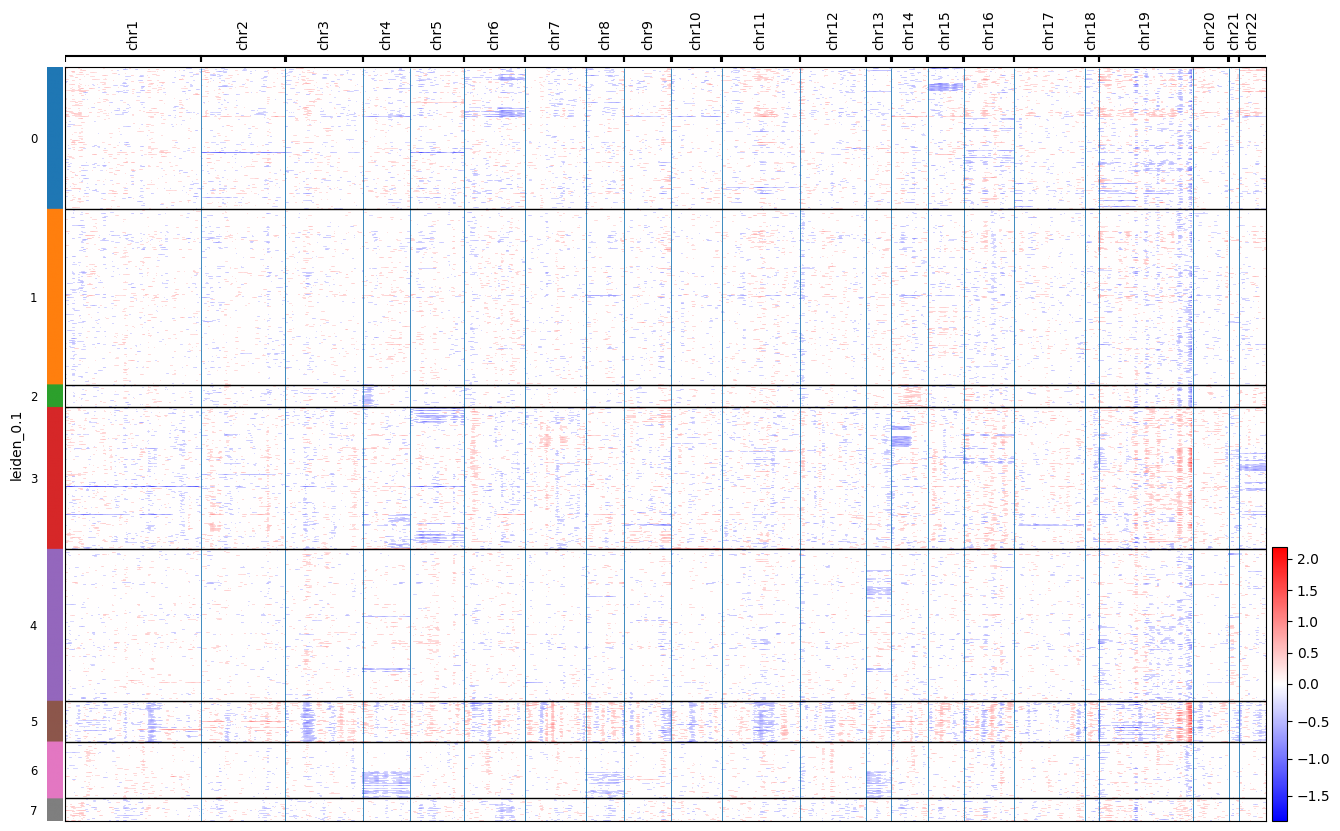

In [63]:
cnv.pl.chromosome_heatmap(adata, groupby="leiden_0.1")

We calculate CNV scores for each cell, defined as the mean of the absolute values of the inferred CNV signal across all genomic regions (genes).

To identify aneuploid vs. euploid cells, we use the 90th percentile of the CNV score distribution as a threshold:  
* cells with a CNV score greater than or equal to this threshold are classified as aneuploid, and the rest as euploid

In [64]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata,)
cnv.tl.leiden(adata, flavor="igraph")
cnv.tl.cnv_score(adata)

In [65]:
adata

AnnData object with n_obs × n_vars = 1499 × 23633
    obs: 'predicted_doublets', 'doublet_scores', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'pct_counts_RIBO', 'outlier', 'leiden_0.1', 'leiden_0.3', 'leiden_0.6', 'leiden_1', 'leiden_1.5', 'leiden_2', 'leiden_2.5', 'leiden_3', 'cnv_leiden', 'cnv_score'
    var: 'n_cells', 'MT', 'RIBO', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'ensembl_gene_id', 'chromosome', 'start', 'end'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden_0.1', 'leiden_0.3', 'leiden_0.6', 'leiden_1', 'leiden_1.5', 'leiden_2', 'leiden_2.5', 'leiden_3', 'leiden_0.1_colors', 'rank_leiden_0.1', 'cnv', 'cnv_neighbors', 'cnv_leiden'
    obsm: 'X_pca', 'X_umap', 'X_cnv', 'X_cnv_pca'
    varm: 'PCs'
    layers: 'normalized', 'log1p'
    obsp: 'distances', 'connectivities', 'cnv_neighbors_distances', 'cnv_nei

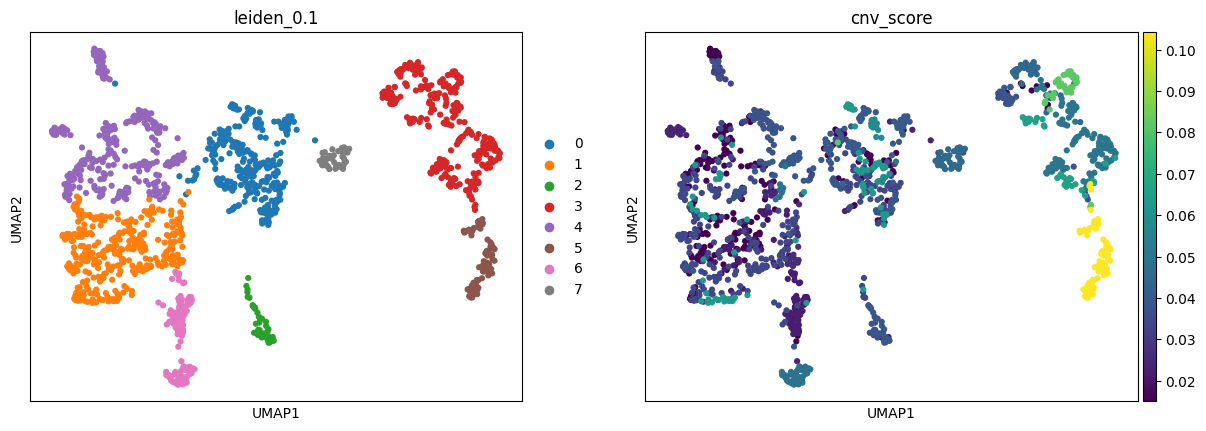

In [66]:
sc.pl.umap(adata, color=['leiden_0.1', 'cnv_score'])

In [67]:
adata.obs["cnv_score"].describe()

count    1499.000000
mean        0.040579
std         0.022114
min         0.015034
25%         0.023933
50%         0.037499
75%         0.050227
max         0.104277
Name: cnv_score, dtype: float64

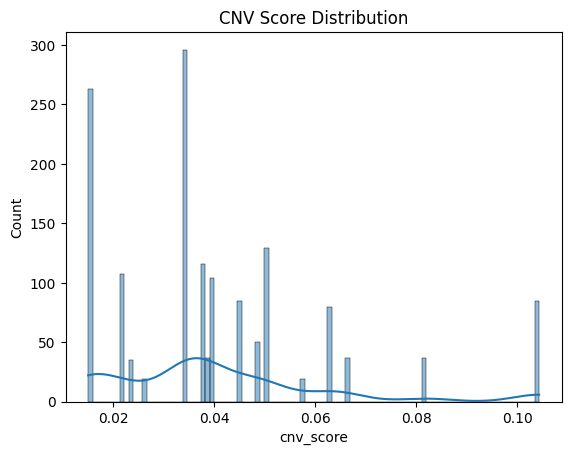

In [68]:
sns.histplot(adata.obs["cnv_score"], bins=100, kde=True);
plt.title("CNV Score Distribution");

In [72]:
threshold = adata.obs["cnv_score"].quantile(0.9).item()
adata.obs["is_aneuploid"] = adata.obs["cnv_score"] >= threshold

Around 10% of the cells are annotated as aneuploids and they are found mostly in cluster 5 and 3

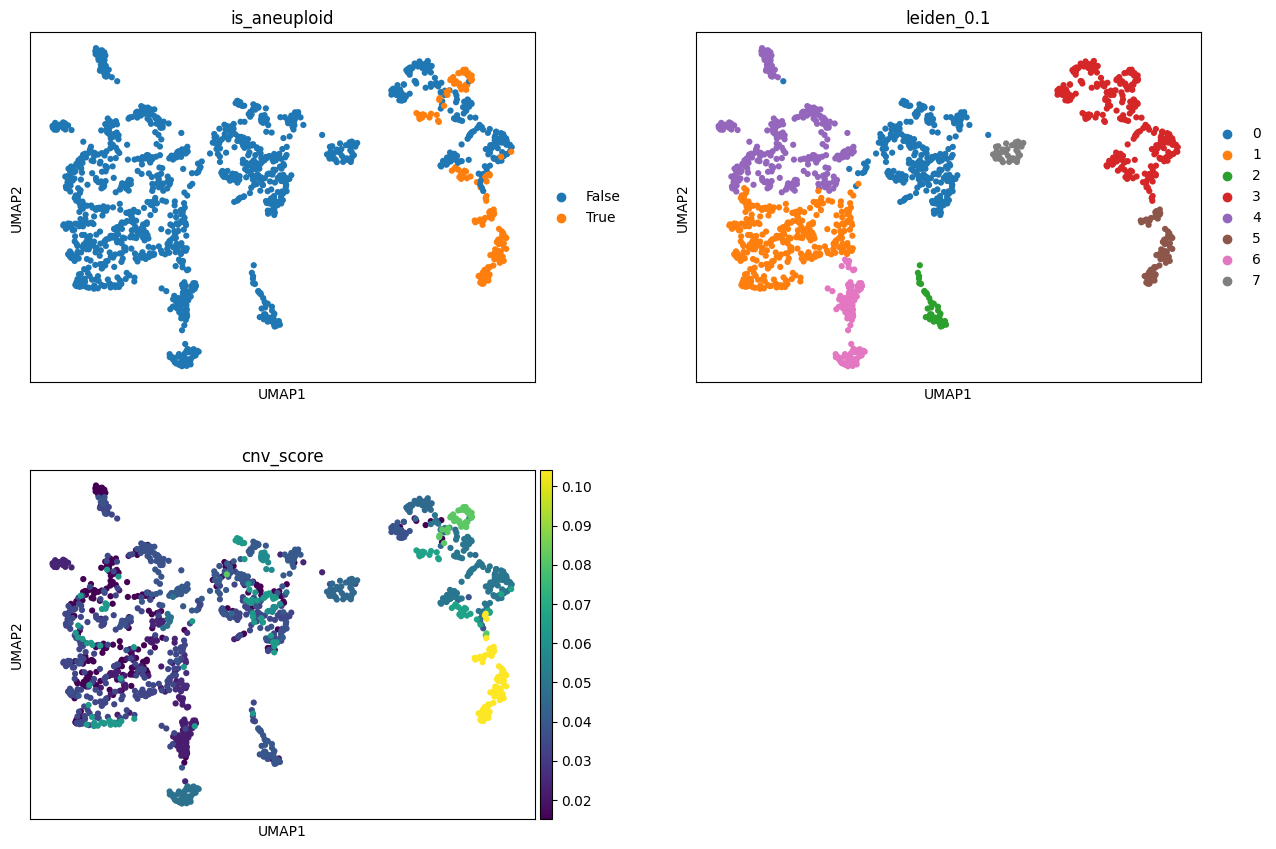

In [70]:
sc.pl.umap(adata, color=["is_aneuploid","leiden_0.1", "cnv_score"], ncols=2, wspace=0.2)

In [71]:
adata.obs['is_aneuploid'].value_counts()

is_aneuploid
False    1340
True      159
Name: count, dtype: int64

# Annotating cell types
In this section, we annotate clusters to determine cell types. In embryos (E3-E7), we would normally expect to have the following cell lineages:  
* Trophectoderm and Inner Cell Mass (ICM) -> (first differentiation)
    * The TE gives rise to the placenta and the ICM differentiates into EPI and PrE
* Epiblast (EPI) and Primitive Endoderm(PrE)
    * The pluripotent EPI differentiates into the germ layers and the PrE differentiates into extraembryonic membranes

We define marker genes for each cell type from literature and try to annotate the identified cell clusters. We also overlay apoptosis and proliferation markers

In [4]:
marker_genes = {
    'Trophectoderm(TE)' : ['GATA2','GATA3', 'TEAD3', 'KRT18'],
    'Inner Cell Mass (ICM)' : ['PRSS3', 'NANOGNB', 'CYP26A1', 'MFN1'],
    'Epiblast (EPI)': ['NANOG', 'SOX2', 'KLF17', 'TDGF1'],
    'Primitive Endoderm': ['SOX17', 'PDGFRA', 'GATA6', 'GATA4'],
    'apoptotic': ['BCL2', 'BAD', 'FAS', 'BAK1'],
    'proliferating': ['MKI67','PCNA', 'CDK6', 'CDK1', 'CDC25A'],
    'stress markers': ['HSF1', 'TP53', 'CCL2', 'SOD2']
}

Based on expression of lineage markers, clusters were annotated into major embryonic lineages. However, lineage-specific marker expression was often overlapping, reflecting the transcriptional plasticity of early-stage cells. Alot of the marker gene expression was ambigious.  
Marker analysis enabled annotation of embryonic lineages (TE, EPI, PE). Marker gene expression patterns suggested widespread lineage plasticity. Cell cycle-related genes were highly expressed across all clusters, consistent with rapid proliferation.  
Cluster 3, annotated as ICM/EPI, showed relatively higher expression of apoptotic markers compared to other clusters, suggesting increased cellular stress or potential susceptibility to apoptosis within this population.

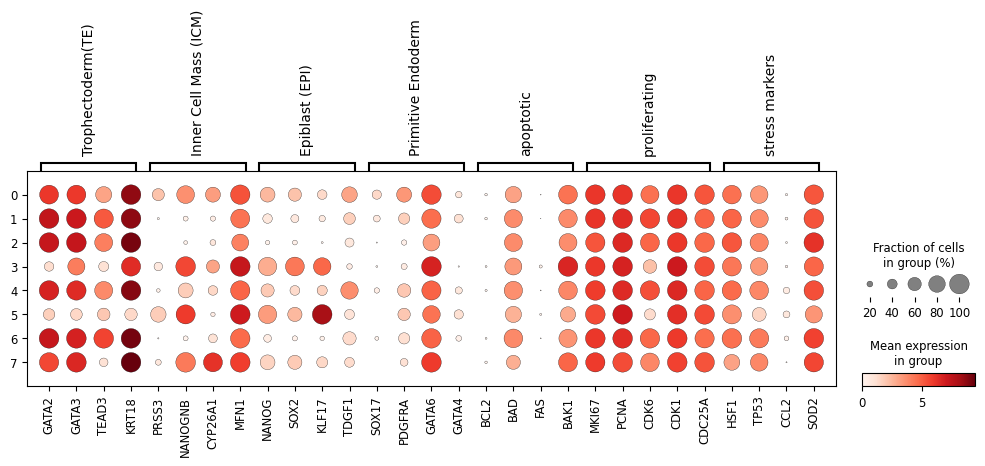

In [5]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden_0.1', use_raw=False, layer="log1p")

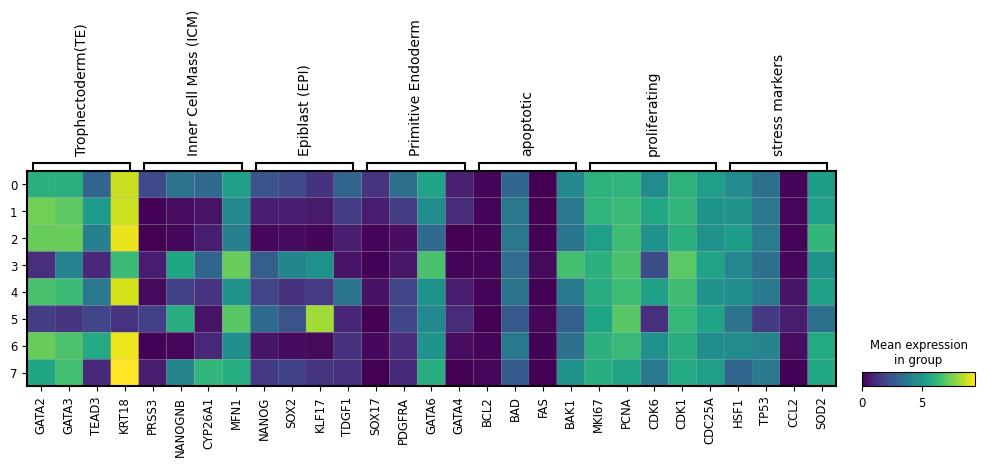

In [6]:
sc.pl.matrixplot(adata, marker_genes, groupby='leiden_0.1', use_raw=False)

In [350]:
cluster_to_celltype = {
    '0': 'TE',
    '1': 'TE',
    '2': 'TE',
    '3':'ICM/EPI',
    '4':'TE',
    '5':'EPI',
    '6':'TE',
    '7':'TE/ICM',
}

dendrogram data not found (using key=dendrogram_leiden_0.1). Running `sc.tl.dendrogram` with default parameters. For fine tuning it is recommended to run `sc.tl.dendrogram` independently.


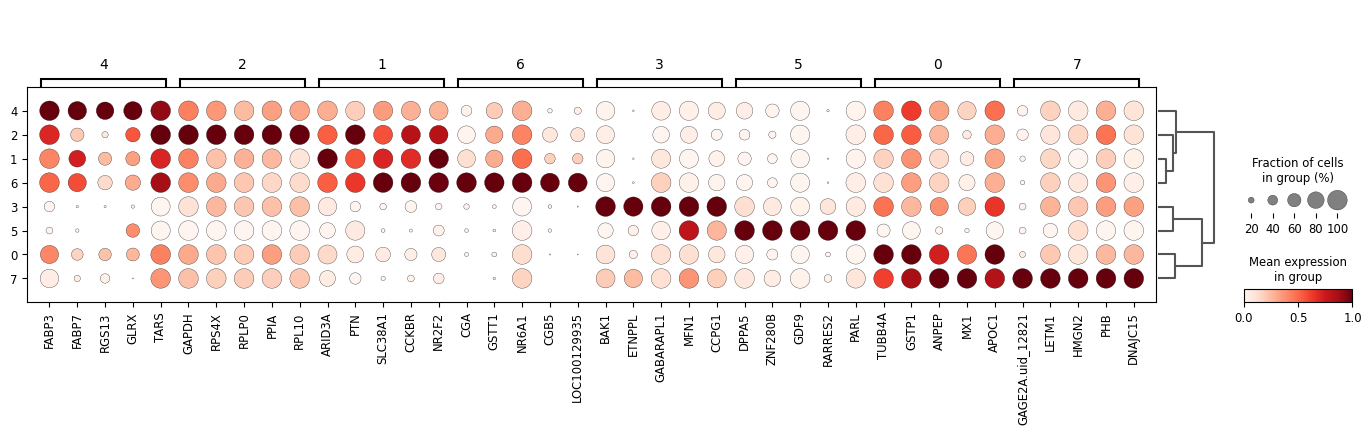

In [241]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_0.1", standard_scale="var", n_genes=5, key="rank_leiden_0.1"
)

In [326]:
adata.obs['cell_type'] = adata.obs['leiden_0.1'].map(cluster_to_celltype)

Cluster 5, annotated as epiblast, were completely aneuploid. Some cells in cluster 3, annotated as epiblast/inner cell mass wwere also aneuploid.  
The epiblast is the cell lineage that forms the germ layers of the fetus, and its viability is highly dependent on having the correct number of chromosomes. Cells in cluster 5 have a high potential for developmental failure and should ideally be expressing apoptosis markers.  
Similarly, the presence of aneuploidy in some cells of Cluster 3 (epiblast/inner cell mass) indicates that chromosomal instability may arise very early in development, even before the formation of the distinct epiblast lineage.

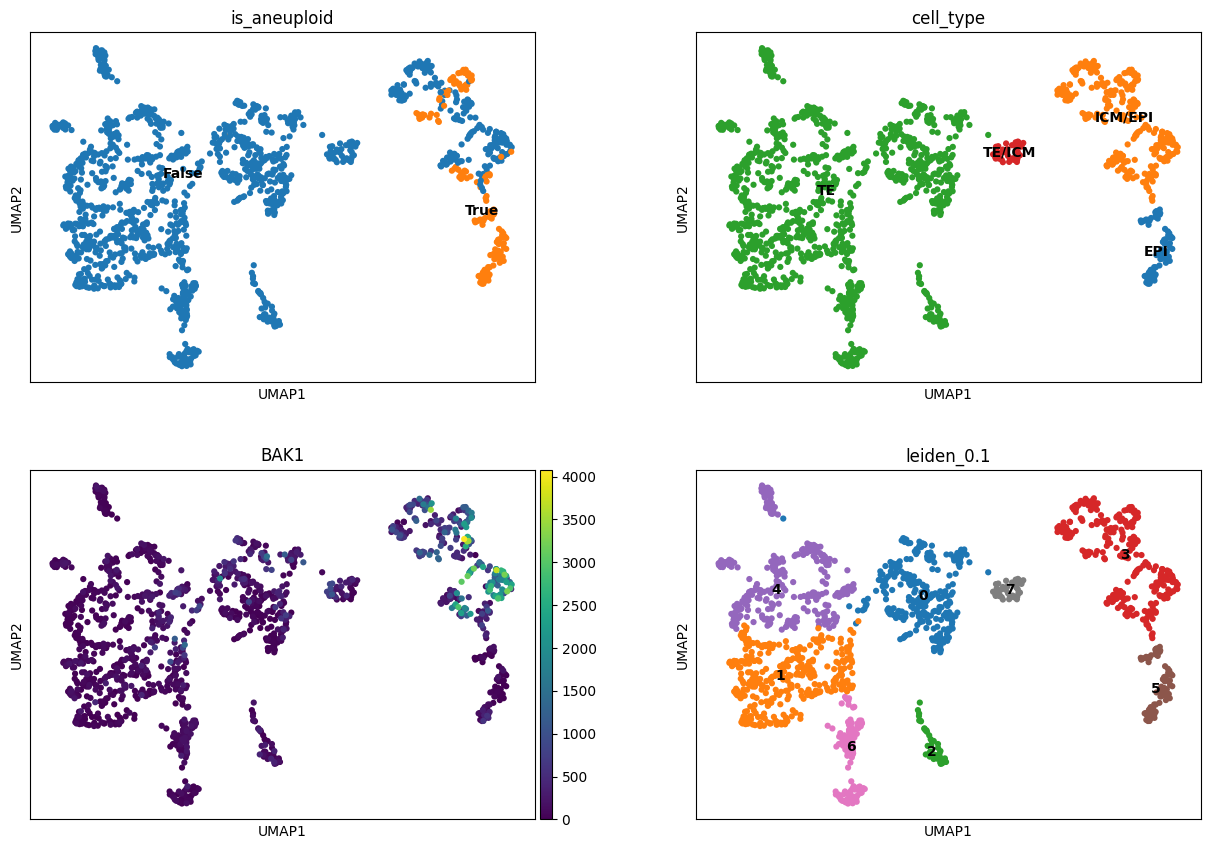

In [6]:
sc.pl.umap(adata, color=["is_aneuploid","cell_type", "BAK1", "leiden_0.1"], ncols=2, wspace=0.2, legend_loc="on data")

In [359]:
sc.tl.paga(adata, groups="leiden_0.1")

Here we look at the PAGA (Partition-based graph abstraction) graph which can be interpretated as developmental trajectory or relationship between the clusters. The nodes are the clusters and the thickness of an edge indicates a stronger connection, suggesting a continuous developmental trajectory or close relationship between the clusters.  
The left plot clearly separates the trophoblast lineage from the inner cell mass and epiblast lineages, establishing the correct developmental relationships between the major cell lineages.  
The right plot maps the karyotype status onto this very same developmental landscape. Aneuploid cells are located in the ICM and epiblast lineages, with more aneuploid cells in the epiblast lineage, indicating a progression of increased aneuploidy with further differentiation.

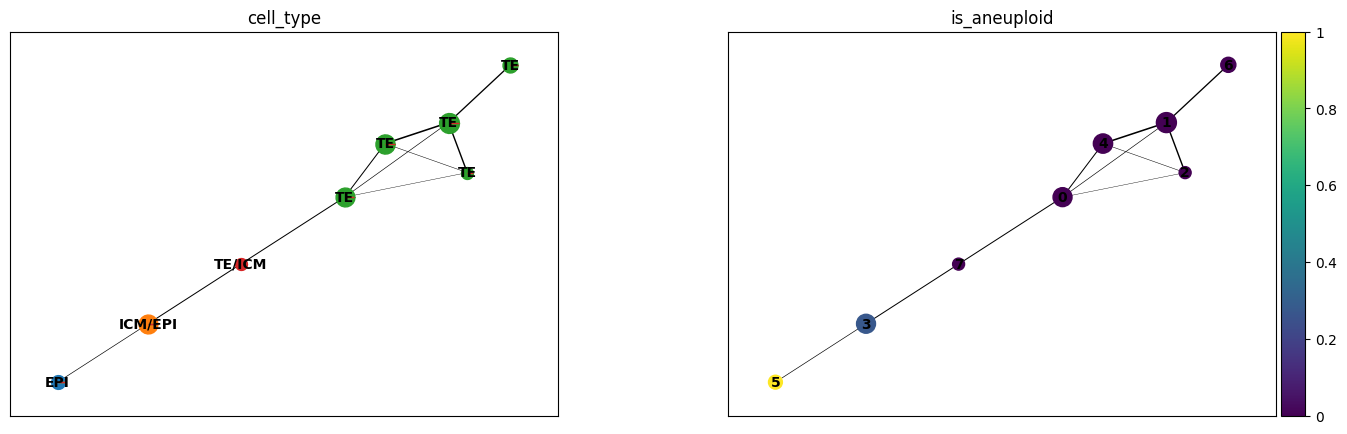

In [7]:
cluster_to_celltype_paga = {0: 'TE', 1: 'TE', 2: 'TE', 3:'ICM/EPI', 4:'TE', 5:'EPI', 6:'TE',7:'TE/ICM'}
sc.pl.paga(adata, color=['cell_type', 'is_aneuploid'], 
           threshold=0.03, labels=cluster_to_celltype_paga)

# Enrichment analysis
In this section, we perform differential gene expression (DE) analysis between karyotype groups (euploid vs. aneuploid). The goal is to identify genes and biological pathways associated with chromosomal abnormalities.

In [18]:
from gprofiler import GProfiler
import matplotlib.pyplot as plt
import seaborn as sns

In [371]:
num_clusters = adata.obs['leiden_0.1'].nunique()
cluster_markers = {}
for cluster in range(num_clusters):
    sc.get.rank_genes_groups_df(adata, str(cluster), key='rank_leiden_0.1').head(100)[['names']].to_csv(f"{cluster}_specific_genes.txt", header=False, index=False)


In [378]:
adata.obs['karyotype'] = ['aneuploid' if x else "euploid" for x in adata.obs['is_aneuploid']]

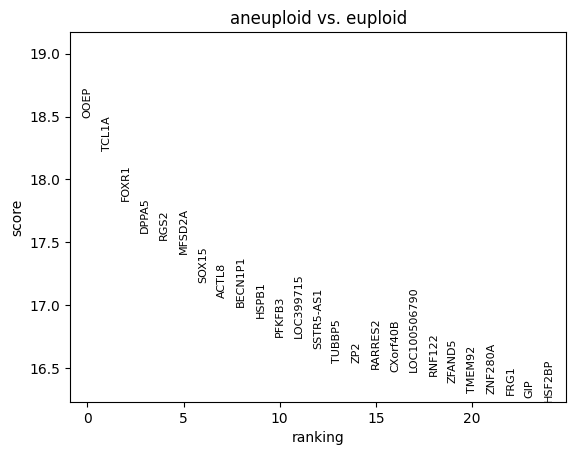

In [379]:
sc.tl.rank_genes_groups(adata, groupby="karyotype", method='wilcoxon', use_raw=False,
                        key_added='rank_euploid', reference="euploid")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key='rank_euploid', ncols=2)

In [8]:
df_ranked = sc.get.rank_genes_groups_df(adata, group="aneuploid", key="rank_euploid")
df_ranked.head(200)[['names']].to_csv("aneuploid_DEG.txt", header=False, index=False)

In [9]:
df_ranked_up = df_ranked[(df_ranked['logfoldchanges'] > 0) & (df_ranked['pvals_adj'] < 0.05)] \
    .sort_values(by="logfoldchanges", ascending=False)
df_ranked_up.head(200)[['names']].to_csv("aneuploid_DEG_upregulated.txt", header=False, index=False)
df_ranked_up

names     scores  logfoldchanges         pvals     pvals_adj
3954  LOC101927394   4.272121       10.703187  1.936225e-05  5.415886e-05
3848       TRIM64C   4.401271       10.439366  1.076187e-05  3.079865e-05
1113        UBTFL1   9.708819       10.371655  2.765208e-22  2.417690e-21
1809       ZNF705G   7.877468        9.305820  3.340825e-15  1.877615e-14
516          LEUTX  11.841393        9.112036  2.384616e-32  4.066062e-31
...            ...        ...             ...           ...           ...
5423        POLR2E   2.700232        0.015247  6.929123e-03  1.473686e-02
3026         NOP58   5.590942        0.012913  2.258407e-08  8.009142e-08
5205         EIF5A   2.925202        0.011742  3.442323e-03  7.593094e-03
5760       EIF3IP1   2.414706        0.010531  1.574789e-02  3.187478e-02
4752         RNPS1   3.374563        0.006622  7.393305e-04  1.766872e-03

[5918 rows x 5 columns]

In [10]:
df_ranked_down = df_ranked[(df_ranked['logfoldchanges'] < 0) & (df_ranked['pvals_adj'] < 0.05)] \
    .sort_values(by="logfoldchanges")
df_ranked_down.head(200)[['names']].to_csv("aneuploid_DEG_downregulated.txt", header=False, index=False)
df_ranked_down

names    scores  logfoldchanges         pvals     pvals_adj
21677    TIMP4 -8.796244      -31.847162  1.414718e-18  9.839324e-18
21430    GBGT1 -8.257070      -31.374468  1.492923e-16  9.180910e-16
19072     TFF1 -4.174750      -29.543272  2.983137e-05  8.211098e-05
18776    CXCR6 -3.774220      -29.463697  1.605089e-04  4.106643e-04
18612   IL36RN -3.543146      -29.296831  3.953844e-04  9.709184e-04
...        ...       ...             ...           ...           ...
3814    MRPL16  4.453687       -0.016038  8.440831e-06  2.434491e-05
5800   CCNDBP1  2.374499       -0.010735  1.757281e-02  3.532348e-02
5427   EXOSC10  2.698875       -0.006995  6.957428e-03  1.479173e-02
5795     LIMA1  2.378665       -0.003434  1.737547e-02  3.495655e-02
5751     DHX15  2.424298       -0.000406  1.533800e-02  3.109307e-02

[6119 rows x 5 columns]

### Discussion of Results 
**Epigenetic Dysregulation**  
Due to aneuploidy, we see upregulated terms such as DNA methylation-dependent constitutive heterochromatin formation and methyl-CpG binding, which point toward increased epigenetic activity. This is consistent with previous findings that genomes with chromosome gains and losses tend to be either hypermethylated or hypomethylated, leading to widespread transcriptional dysregulation [(Wang et al., 2024)](https://doi.org/10.1038/s41588-024-01788-6). The enrichment of these epigenetic terms suggests that aneuploid cells attempt to compensate for genomic instability through altered chromatin structure and DNA methylation.

---

**Impaired Developmental Signaling & Cell Differentiation**  
In aneuploid cells, we observe upregulation of several homeobox transcription factors such as DUXA and IPF1, both of which are known to play essential roles in early embryonic development and cell fate specification [(Bürglin, 2010)](https://doi.org/10.1007/978-90-481-9069-0_5). Additionally, Smad2, a key component of the TGF-β signaling pathway that influence cell proliferation and differentiation, is also upregulated.
We hypothesize that this transcriptional dysregulation contributes to the downregulation of key biological processes involved in embryonic development, including:
- *Developmental process*
- *Cell differentiation*
- *Tissue development*
- *Blood vessel morphogenesis*
- *Circulatory system development*
---

**Impaired Cell-Cell Communication & Extracellular Signaling**  
The down regulation of biological process terms such as response to endogenous stimulus, response to chemical and cell surface receptor signalling pathway indicate a broad failure of the aneuploid cells to properly send, receive, and respond to signals, which are essential for coordinating the complex behaviors of a developing embryo.


In [ ]:
gp = GProfiler(return_dataframe=True)
up_reg_go = gp.profile(organism='hsapiens', query=list(df_ranked_up.head(200)['names']))
up_reg_go

In [ ]:
up_reg_go["label"] = up_reg_go["source"] + ":" + up_reg_go["name"]
up_reg_go["log_p"] = -np.log10(up_reg_go["p_value"])
up_reg_go

In [ ]:
up_reg_go_sorted = up_reg_go.sort_values(by=["source", "log_p"], ascending=[True, False])
up_reg_go_sorted

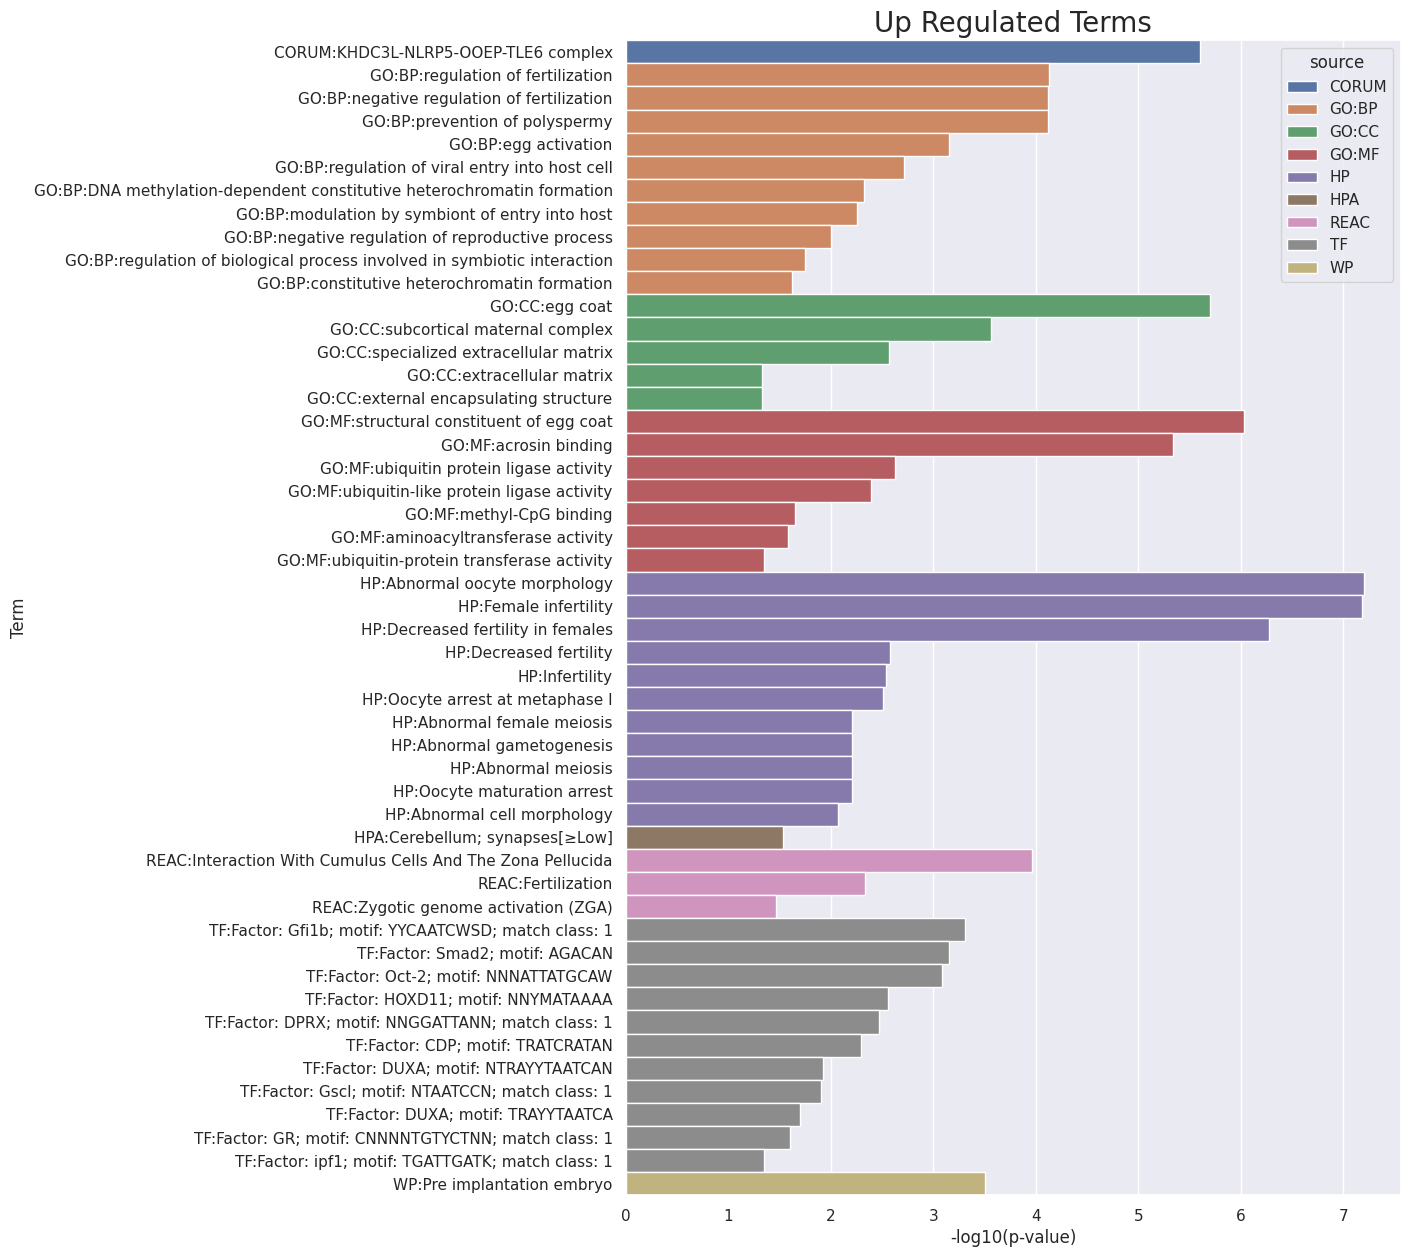

In [43]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 15))
sns.barplot(
    x="log_p", 
    y="label", 
    data=up_reg_go_sorted, 
    estimator=sum,
    hue="source",
    dodge=False,
    width=1);
plt.xlabel("-log10(p-value)")
plt.ylabel("Term")
plt.title("Up Regulated Terms", fontsize=20);

In [ ]:
down_reg_go = gp.profile(organism='hsapiens', query=list(df_ranked_down.head(200)['names']))
down_reg_go

In [ ]:
down_reg_go["label"] = down_reg_go["source"] + ":" + down_reg_go["name"]
down_reg_go["log_p"] = -np.log10(down_reg_go["p_value"])
down_reg_go

In [ ]:
down_reg_go_sorted = down_reg_go.sort_values(by=["source", "log_p"], ascending=[True, False])
down_reg_go_sorted

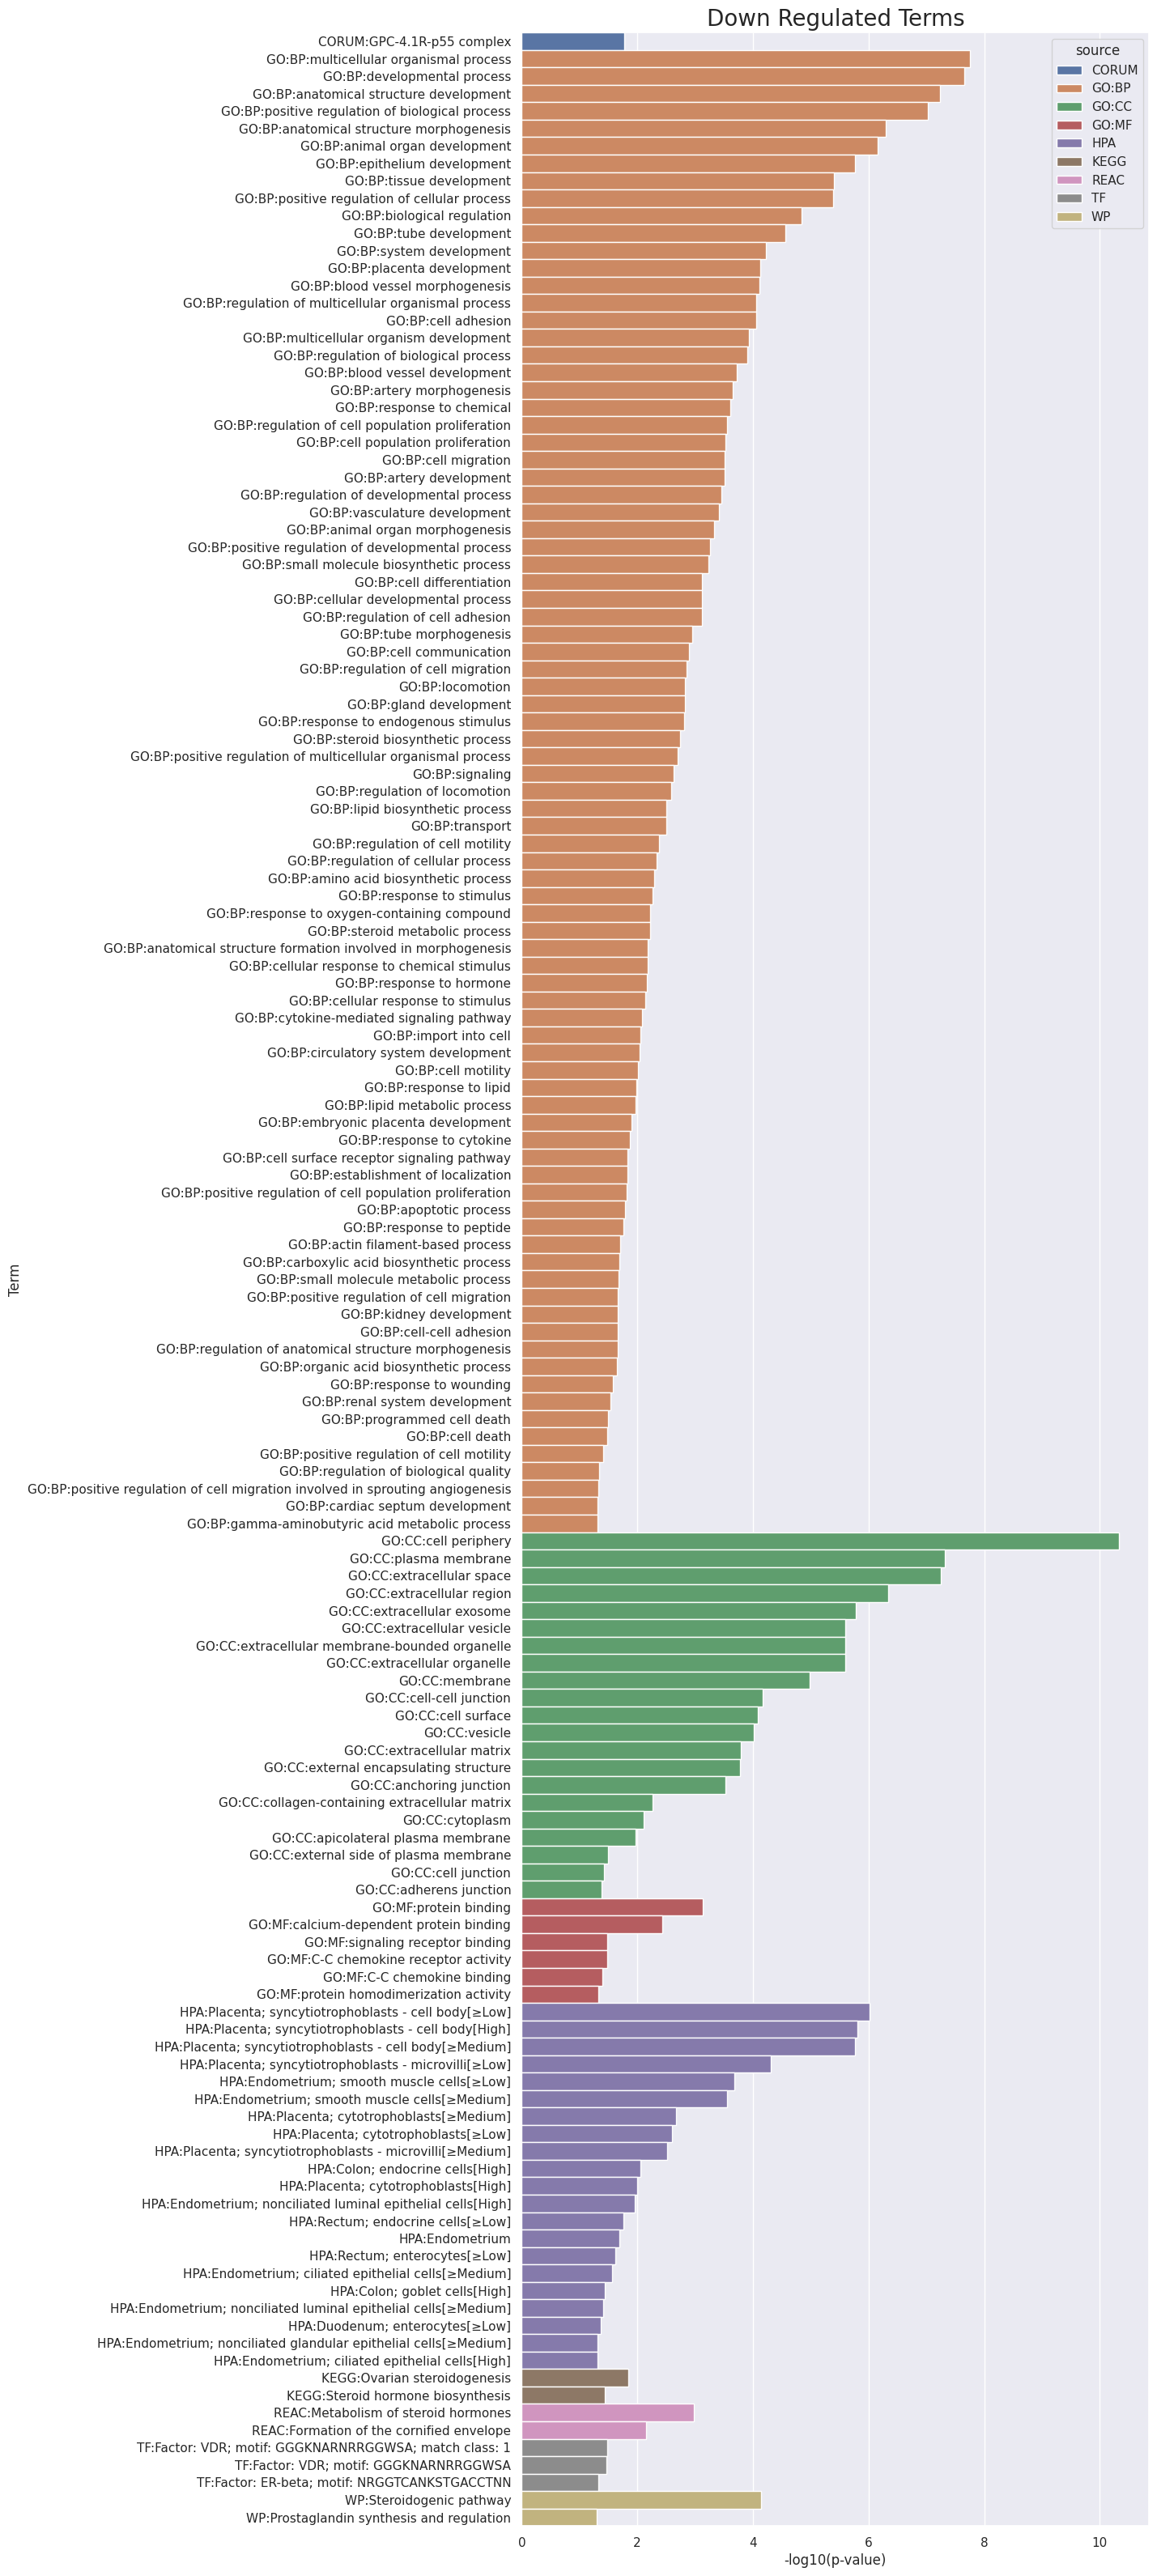

In [45]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 40))
sns.barplot(
    x="log_p", 
    y="label", 
    data=down_reg_go_sorted, 
    estimator=sum, 
    hue="source",
    dodge=False,
    width=1);
plt.xlabel("-log10(p-value)")
plt.ylabel("Term")
plt.title("Down Regulated Terms", fontsize=20);

In [15]:
up_reg_go.to_csv("upregulated_go_terms.csv", sep="\t")
down_reg_go.to_csv("downregulated_go_terms.csv", sep="\t")

In [ ]:
adata.write_h5ad('data/cell_fate_2_processed_annotated.h5ad', compression="gzip")

In [2]:
adata = sc.read_h5ad('data/cell_fate_2_processed_annotated.h5ad')

# Conclusion
In conclusion, aneuploidy profoundly impacts the identity and functional state of early human embryonic cells, leading to the failure of developmental processes. Our analysis of single-cell RNA sequencing data reveals a dysfunctional transcriptional identity and a widespread collapse of functional cellular states. Aneuploid cells lose their proper embryonic identity, as shown by impaired developmental signaling and differentiation. This compromised identity manifests as a severe breakdown in the functional state of the embryo, with the downregulation of terms related to cell differentiation and tissue development.  
This loss of functional identity and cellular integrity is likely the reason why aneuploid embryos have low viability